# Robotex - Bolt assignemnt
### Andrzej Dudziec 09.2022

### Getting familiar with the data

In [1]:
# General goals:
# - riders can always get a ride
# - drivers have stable earnings

# Exploration
# - time - when the demand is higher/lower - time of day, day of week, possibly aggregate
# - how demand changes over time and space - some visualization on the map in clusters (hexagons/square)
# - propose a solution, how to guide the drivers to areas with higher demand (do not over supply :) )

# Build and document a baseline model for your solution
# Describe how you would design and deploy such a model
# Describe how to communicate model recommendations to drivers
# Think through and describe the design of the experiment  that would validate your solution for live operations taking into account marketplace specifics

In [2]:
import pandas as pd
import matplotlib

In [3]:
df = pd.read_csv("../data/robotex5.csv")
df["start_time"] = pd.to_datetime(df.start_time)
df[["day", "hour", "dow"]] = df.apply(lambda x: [x.start_time.strftime('%Y-%m-%d'), x.start_time.hour, x.start_time.dayofweek], axis=1, result_type="expand")
df.head()

start_time  start_lat  start_lng    end_lat    end_lng  \
0 2022-03-06 15:02:39.329452  59.407910  24.689836  59.513027  24.831630   
1 2022-03-10 11:15:55.177526  59.441650  24.762712  59.426450  24.783076   
2 2022-03-06 14:23:33.893257  59.435404  24.749795  59.431901  24.761588   
3 2022-03-03 09:11:59.104192  59.406920  24.659006  59.381093  24.641652   
4 2022-03-06 00:13:01.290346  59.434940  24.753641  59.489203  24.876170   

   ride_value         day  hour  dow  
0     3.51825  2022-03-06    15    6  
1     0.50750  2022-03-10    11    3  
2     0.19025  2022-03-06    14    6  
3     0.75600  2022-03-03     9    3  
4     2.27100  2022-03-06     0    6

In [4]:
print("max", df.start_time.max())
print("min", df.start_time.min())
print("shape", df.shape)

max 2022-03-28 23:59:53.175658
min 2022-03-01 00:00:07.936317
shape (627210, 9)


In [5]:
df.groupby("day").agg(cnt=('ride_value', 'count'))

cnt
day              
2022-03-01  19532
2022-03-02  20436
2022-03-03  18494
2022-03-04  20695
2022-03-05  23000
2022-03-06  18090
2022-03-07  15147
2022-03-08  21362
2022-03-09  22294
2022-03-10  20211
2022-03-11  22472
2022-03-12  25139
2022-03-13  19916
2022-03-14  16777
2022-03-15  23598
2022-03-16  24740
2022-03-17  22312
2022-03-18  24760
2022-03-19  27700
2022-03-20  21735
2022-03-21  18782
2022-03-22  26124
2022-03-23  27170
2022-03-24  24601
2022-03-25  27579
2022-03-26  30335
2022-03-27  23869
2022-03-28  20340

## Data groupped by day and hour

In [6]:
df_groupped_day = df[["dow", "hour", "ride_value"]].groupby(["dow"]).agg(ride_value_sum=('ride_value', 'sum'), ride_count=('ride_value', 'count'), ride_value_median=('ride_value', 'median'))
#df_groupped_day.head()

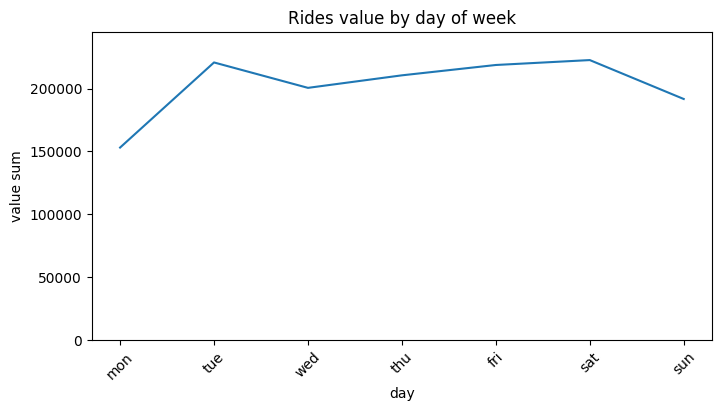

In [7]:
df_plot = df_groupped_day.reset_index()
ax = df_plot["ride_value_sum"].\
    plot(figsize=(8, 4), title="Rides value by day of week", ylabel="value sum", xlabel="day", rot=45, xticks=[i for i in range(7)]);
ax.set_ylim(0, max(df_plot["ride_value_sum"])*1.1)
ax.set_xticklabels(["mon", "tue", "wed", "thu", "fri", "sat", "sun"]);

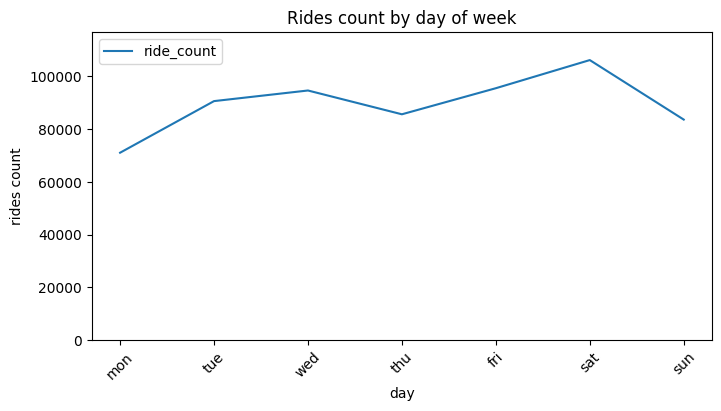

In [8]:
df_plot = df_groupped_day.reset_index()
ax = df_plot[["ride_count"]].\
    plot(figsize=(8, 4), title="Rides count by day of week", ylabel="rides count", xlabel="day", rot=45, xticks=[i for i in range(7)]);
ax.set_ylim(0, max(df_plot["ride_count"])*1.1)
ax.set_xticklabels(["mon", "tue", "wed", "thu", "fri", "sat", "sun"]);

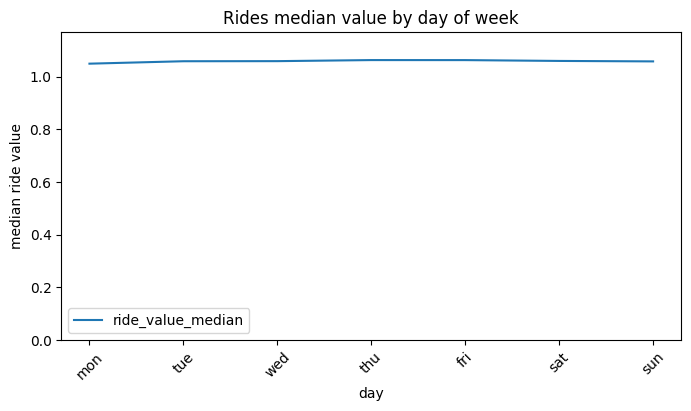

In [9]:
df_plot = df_groupped_day.reset_index()
ax = df_plot[["ride_value_median"]].\
    plot(figsize=(8, 4), title="Rides median value by day of week", ylabel="median ride value", xlabel="day", rot=45, xticks=[i for i in range(7)]);
ax.set_ylim(0, max(df_plot["ride_value_median"])*1.1)
ax.set_xticklabels(["mon", "tue", "wed", "thu", "fri", "sat", "sun"]);

In [10]:
df_groupped_day_hour = df[["dow", "hour", "ride_value"]]\
    .groupby(["dow", "hour"]).agg(ride_value_sum=('ride_value', 'sum'), ride_count=('ride_value', 'count'), ride_value_median=('ride_value', 'median'))
#df_groupped_day_hour.head(24)

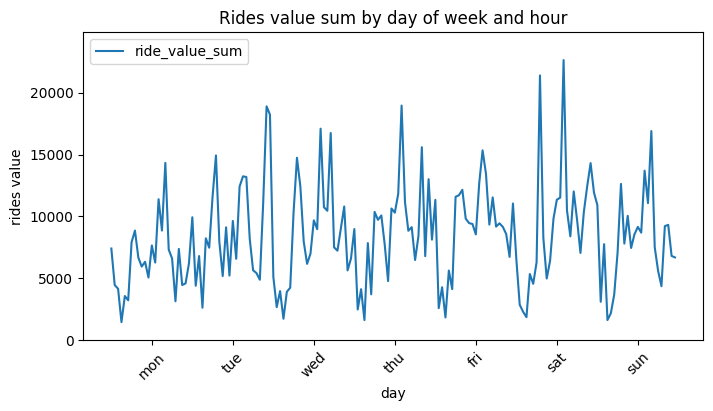

In [11]:
df_plot = df_groupped_day_hour.reset_index()
ax = df_plot[["ride_value_sum"]].\
    plot(figsize=(8, 4), title="Rides value sum by day of week and hour", ylabel="rides value", xlabel="day", rot=45, xticks=[12 + i*24 for i in range(7)]);
ax.set_ylim(0, max(df_plot["ride_value_sum"])*1.1)
ax.set_xticklabels(["mon", "tue", "wed", "thu", "fri", "sat", "sun"]);

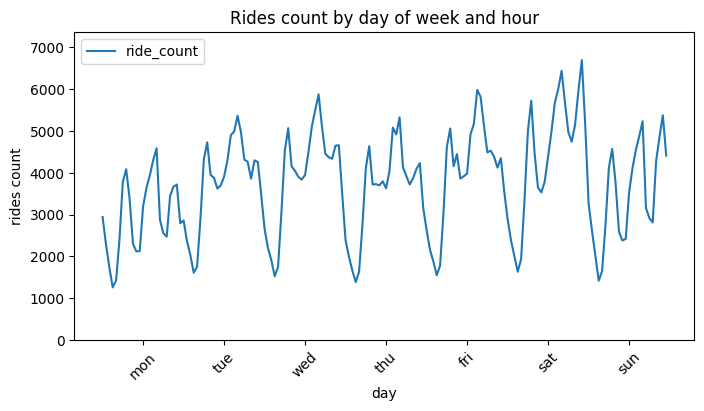

In [12]:
df_plot = df_groupped_day_hour.reset_index()
ax = df_plot[["ride_count"]].\
    plot(figsize=(8, 4), title="Rides count by day of week and hour", ylabel="rides count", xlabel="day", rot=45, xticks=[12 + i*24 for i in range(7)]);
ax.set_ylim(0, max(df_plot["ride_count"])*1.1)
ax.set_xticklabels(["mon", "tue", "wed", "thu", "fri", "sat", "sun"]);

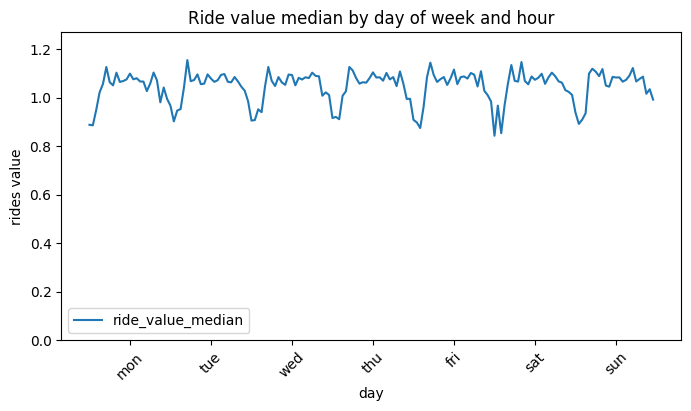

In [13]:
df_plot = df_groupped_day_hour.reset_index()
ax = df_plot[["ride_value_median"]].\
    plot(figsize=(8, 4), title="Ride value median by day of week and hour", ylabel="rides value", xlabel="day", rot=45, xticks=[12 + i*24 for i in range(7)]);
ax.set_ylim(0, max(df_plot["ride_value_median"])*1.1)
ax.set_xticklabels(["mon", "tue", "wed", "thu", "fri", "sat", "sun"]);

### Group by hour

In [14]:
df_groupped_hour = df[["hour", "ride_value"]].groupby(["hour"]).agg(ride_value_sum=('ride_value', 'sum'), ride_count=('ride_value', 'count'), ride_value_median=('ride_value', 'median'))
#df_groupped_hour.head()

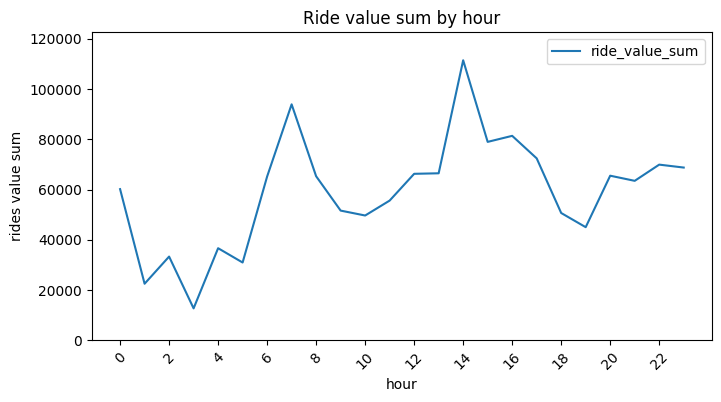

In [15]:
df_plot = df_groupped_hour.reset_index()
ax = df_plot[["ride_value_sum"]].\
    plot(figsize=(8, 4), title="Ride value sum by hour", ylabel="rides value sum", xlabel="hour", rot=45, xticks=[2*i for i in range(12)]);
ax.set_ylim(0, max(df_plot["ride_value_sum"])*1.1)
ax.set_xticklabels([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22]);

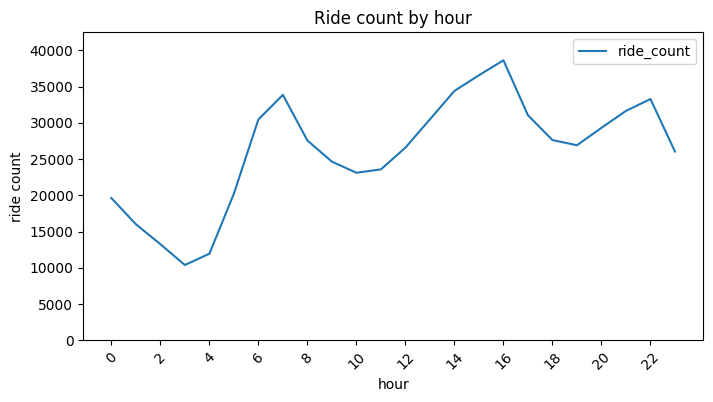

In [16]:
df_plot = df_groupped_hour.reset_index()
ax = df_plot[["ride_count"]].\
    plot(figsize=(8, 4), title="Ride count by hour", ylabel="ride count", xlabel="hour", rot=45, xticks=[2*i for i in range(12)]);
ax.set_ylim(0, max(df_plot["ride_count"])*1.1)
ax.set_xticklabels([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22]);

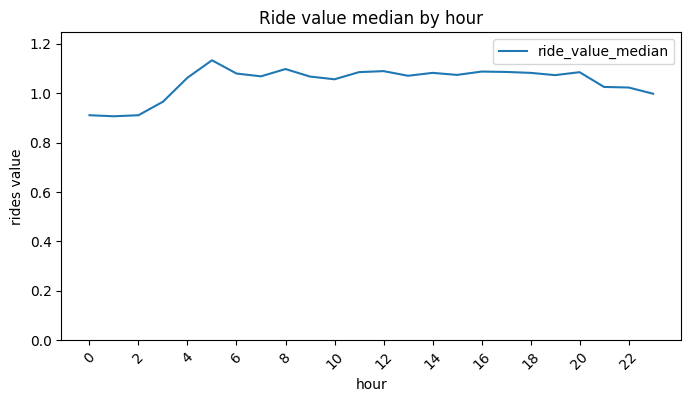

In [17]:
df_plot = df_groupped_hour.reset_index()
ax = df_plot[["ride_value_median"]].\
    plot(figsize=(8, 4), title="Ride value median by hour", ylabel="rides value", xlabel="hour", rot=45, xticks=[2*i for i in range(12)]);
ax.set_ylim(0, max(df_plot["ride_value_median"])*1.1)
ax.set_xticklabels([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22]);

## Data groupped by geo

In [ ]:
# based on: https://jens-wirelesscar.medium.com/lhexagone-in-hexagons-uber-h3-map-1566bc412172
import folium
from folium.plugins import TimestampedGeoJson
from geojson import Feature, Point, FeatureCollection
import json

def hexagons_dataframe_to_geojson(df_hex, file_output = None, column_name = "value", animated=False):
    """
    Produce the GeoJSON for a dataframe, constructing the geometry from the "hex_id" column
    and with a property matching the one in column_name
    """
    list_features = []

    for i,row in df_hex.iterrows():
        try:
            geometry_for_row = { "type" : "Polygon", "coordinates": [h3.h3_to_geo_boundary(h=row["hex_id"],geo_json=True)]}
            properties = {column_name : row[column_name]}
            if animated:
                # for TimestampedGeoJson times property is needed and style function cannot be passed later
                properties["times"] = [row["times"]]
                properties["style"] = {
                    'fillColor': row["color"],
                    'color': 'black',
                    'weight': 1,
                    'fillOpacity': 0.7
                }
            feature = Feature(geometry = geometry_for_row , id=row["hex_id"], properties = properties)
            list_features.append(feature)
        except:
            print("An exception occurred for hex " + row["hex_id"])

    feat_collection = FeatureCollection(list_features)
    geojson_result = json.dumps(feat_collection)
    return geojson_result

def get_color(custom_cm, val, vmin, vmax):
    return matplotlib.colors.to_hex(custom_cm((val-vmin)/(vmax-vmin)))

def choropleth_map(df_aggreg, column_name = "value", border_color = 'black', fill_opacity = 0.7, color_map_name = "Blues", initial_map = None):
    """
    Creates choropleth maps given the aggregated data. initial_map can be an existing map to draw on top of.
    """
    #colormap
    min_value = df_aggreg[column_name].min()
    max_value = df_aggreg[column_name].max()
    mean_value = df_aggreg[column_name].mean()
    #print(f"Colour column min value {min_value}, max value {max_value}, mean value {mean_value}")
    #print(f"Hexagon cell count: {df_aggreg['hex_id'].nunique()}")

    # the name of the layer just needs to be unique, put something silly there for now:
    name_layer = "Choropleth " + str(df_aggreg)

    if initial_map is None:
        initial_map = folium.Map(location= [59.4, 24.75], zoom_start=10, tiles="cartodbpositron")

    #create geojson data from dataframe
    geojson_data = hexagons_dataframe_to_geojson(df_hex = df_aggreg, column_name = column_name)

    # color_map_name 'Blues' for now, many more at https://matplotlib.org/stable/tutorials/colors/colormaps.html to choose from!
    custom_cm = matplotlib.cm.get_cmap(color_map_name)

    folium.GeoJson(
        geojson_data,
        style_function=lambda feature: {
            'fillColor': get_color(custom_cm, feature['properties'][column_name], vmin=min_value, vmax=max_value),
            'color': border_color,
            'weight': 1,
            'fillOpacity': fill_opacity
        },
        name = name_layer
    ).add_to(initial_map)

    return initial_map

def choropleth_map_animated(df_aggreg, column_name = "value", initial_map = None):
    if initial_map is None:
        initial_map = folium.Map(location= [59.4, 24.75], zoom_start=10, tiles="cartodbpositron")

    #create geojson data from dataframe
    geojson_data = hexagons_dataframe_to_geojson(df_hex = df_aggreg, column_name = column_name, animated=True)

    TimestampedGeoJson(
        geojson_data,
        transition_time=200,
        period='PT30M',
        duration='PT30M'
    ).add_to(initial_map)

    return initial_map



In [21]:
import h3
import scipy.stats as scs

In [22]:
# generate hexagons
hex_ids_start = df.apply(lambda row: h3.geo_to_h3(row.start_lat, row.start_lng, 8), axis = 1)
hex_ids_end = df.apply(lambda row: h3.geo_to_h3(row.end_lat, row.end_lng, 8), axis = 1)
df = df.assign(hex_id_start=hex_ids_start.values,
               hex_id_end=hex_ids_end.values)

In [23]:
# prepare grouping in hexagons
df_hex_start = df.groupby("hex_id_start", as_index=False).agg(ride_count=('ride_value', 'count')).rename(columns={"hex_id_start": "hex_id"})
df_hex_start["percentile"] = [scs.percentileofscore(df_hex_start["ride_count"].values, i) for i in df_hex_start["ride_count"].values]

df_hex_end = df.groupby("hex_id_end", as_index=False).agg(ride_count=('ride_value', 'count')).rename(columns={"hex_id_end": "hex_id"})
df_hex_end["percentile"] = [scs.percentileofscore(df_hex_end["ride_count"].values, i) for i in df_hex_end["ride_count"].values]

#### Heatmap of starting points

In [24]:
choropleth_map(df_aggreg = df_hex_start, color_map_name = "Blues", column_name = "percentile")

#### Heatmap of destination points

In [25]:
choropleth_map(df_aggreg = df_hex_end, color_map_name = "Blues", column_name = "percentile")

## Solution

In [26]:
# "live" heatmap, that shows current demand, so the drivers can follow the needs of riders

In [27]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
min_time = pd.Timestamp('2022-03-01 00:00:00')
max_time = min_time + pd.Timedelta('30 minutes')
custom_cm = matplotlib.cm.get_cmap("Blues")
animated_data = pd.DataFrame()

while max_time <= pd.Timestamp('2022-03-01 23:59:59'): #
    tmp = df[(df['start_time'] > min_time) & (df['start_time'] <= max_time)]\
        .groupby("hex_id_start", as_index=False).agg(ride_count=('ride_value', 'count')).rename(columns={"hex_id_start": "hex_id"})
    tmp["percentile"] = [scs.percentileofscore(tmp["ride_count"].values, i) for i in tmp["ride_count"].values]
    tmp["color"] = tmp.apply(lambda row: get_color(custom_cm, row["percentile"], vmin=min(tmp["percentile"]), vmax=max(tmp["percentile"])), axis=1)
    tmp["times"] = min_time.timestamp()*1000
    animated_data = animated_data.append(tmp)
    min_time = max_time
    max_time = min_time + pd.Timedelta('30 minutes')

animated_map = choropleth_map_animated(df_aggreg = animated_data, column_name = "percentile")
animated_map

In [29]:
import os

os.system('jupyter nbconvert --to html robotex.ipynb')

[NbConvertApp] Converting notebook robotex.ipynb to html
[NbConvertApp] Writing 1095492 bytes to robotex.html


0